In [1]:
from sklearn.neighbors import KNeighborsClassifier as kNC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score as acc

import matplotlib.pyplot as plt

import numpy as np

# import dataset packages
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split

# import from project files
from utils import plot_2d, plot_classifier_boundary

In [2]:
# kNN
# + Easy to implement for multiclass problems
# - KNN is very sensitive to outliers
# - Dimensionality: KNN is more appropriate to use when you have a small number of inputs.
# - Class imbalance can be an issue: kNN might wrongly vote for majority class
# - Sample size needs to be large enough and dense enough


# Decision Trees
# + Good with High Level Data: e.g. age, income, 
# - Bad with Low Level Data: data with many predictors/inputs
# - Trees can overfit: Overfitting increases with depth of tree

In [3]:
def data_nn():

    # kNN score - 0.92
    # DT score - 0.85/0.86
    nn_X, nn_y = make_blobs(
        n_samples=1500,
        n_features=2,
        centers=220,
        cluster_std=.16,
        random_state=42
    )
    nn_y = nn_y % 2 # to reduce the amount of different labels to 2

    # lr_X, lr_y = make_blobs(
    #     n_samples=[700, 200], 
    #     centers=[(3,5),(6,5)],             
    #     n_features=2, 
    #     cluster_std=[5, 4],
    #     random_state=1, 
    #     shuffle=False)

    # lr_X, lr_y = make_moons(
    #     n_samples=[600, 100], 
    #     noise=0.5)

    return nn_X, nn_y

In [4]:
def data_dt():

    # kNN score - 0.78 (k = 12) 0.70 (k = 3)
    # DT score - 0.63
    dt_X, dt_y = make_blobs(
        n_samples=[700, 200], 
        centers=[(3,5),(6,5)],             
        n_features=2, 
        cluster_std=[5, 4],
        random_state=1, 
        shuffle=False)

    # kNN score - 0.84
    # DT score - 0.84
    # dt_X, dt_y = make_blobs(
    #     n_samples=[200, 200], 
    #     centers=[(3,5),(6,5)],             
    #     n_features=2, 
    #     cluster_std=[2, 1],
    #     random_state=1, 
    #     shuffle=False)

    # dt_X, dt_y = make_circles(
    #     noise=0.2, 
    #     factor=0.5, 
    #     random_state=1)

    # dt_X, dt_y = make_blobs(
    #     n_samples=[300, 200], 
    #     centers=[(3,5),(6,5)],             
    #     n_features=2, 
    #     # cluster_std=[5, 4],
    #     random_state=1, 
    #     shuffle=False)

    # knn - 0.90
    # dt - 0.80
    # dt_X, dt_y = make_moons(
    #     n_samples=[200, 200], 
    #     noise=0.3)

    return dt_X, dt_y

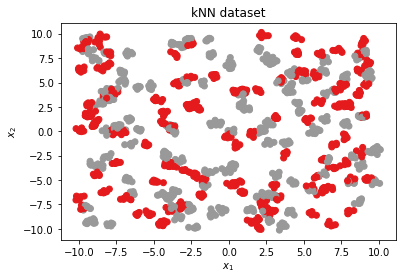

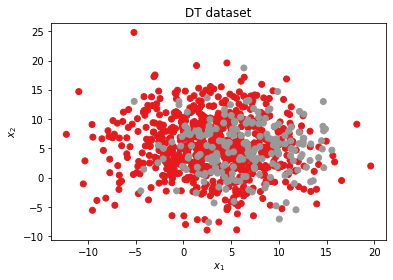

In [5]:
# kNN data generation and splitup
nn_X, nn_y = data_nn()
plot_2d(nn_X, nn_y, 'kNN dataset')

nn_X_train, nn_X_test, nn_y_train, nn_y_test = train_test_split(nn_X, nn_y, test_size=.33, random_state=42)

# Decision Tree data generation and splitup
dt_X, dt_y = data_dt()
plot_2d(dt_X, dt_y, 'DT dataset')

dt_X_train, dt_X_test, dt_y_train, dt_y_test = train_test_split(dt_X, dt_y, test_size=.33, random_state=42)


In [6]:
# EVALUATION

# method to get accuracy of model
def model_score(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    return np.array([acc(y_test,y_test_pred),
                     acc(y_train,y_train_pred)])

# kNN Evaluation 
def knn_classifier_score(k,X_train,y_train,X_test,y_test):
    # print(k)
    model=kNC(n_neighbors=k).fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    return np.array([ 1 - acc(y_test,y_test_pred),
                      1 - acc(y_train,y_train_pred)])


# Decision Tree Evaluation
def dt_classifier_score(max_depth,X_train,y_train,X_test,y_test):
    # print(max_depth)
    model=DTC(criterion='entropy', max_depth=max_depth).fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    return np.array([ 1 - acc(y_test,y_test_pred),
                      1 - acc(y_train,y_train_pred)])

#  Underfitting – Validation and training error high
#  Overfitting – Validation error is high, training error low
#  Good fit – Validation error low, slightly higher than the training error
#  Unknown fit - Validation error low, training error 'high'


In [7]:
# PLOTTING

# plot errors
def plot_test_training_err(param_values, test_err, train_err, title, hyperparam):
    plt.xlabel('$' + hyperparam + '$')
    plt.ylabel('$classification~~error$')
    # plt.ylabel('$score$')
    plt.title(title)
    plt.plot(param_values,test_err,color='red')
    plt.plot(param_values,train_err,color='blue')
    plt.legend(['test','train']);

In [35]:
# Hyperparameters

# kNN
k = 3
k_values = np.arange(1, 30, 2)

# DT
# max tree depth
# min samples per leaf
# split measure
min_samples_split = 1
samples_values = np.arange(1, 40, 2)
max_depth = None
depth_values = np.arange(5, 40, 5)

kNN score on kNN dataset: 0.92


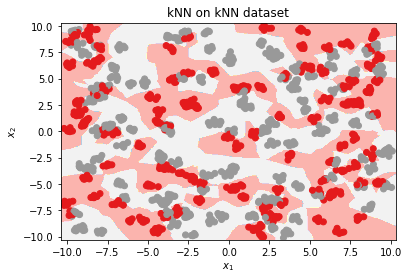

In [25]:
# kNN

knn = kNC(n_neighbors=k)
knn.fit(nn_X_train, nn_y_train)
print('kNN score on kNN dataset: %.2f' % (knn.score(nn_X_test, nn_y_test)))

plot_classifier_boundary(knn, nn_X, nn_y, title='kNN on kNN dataset')

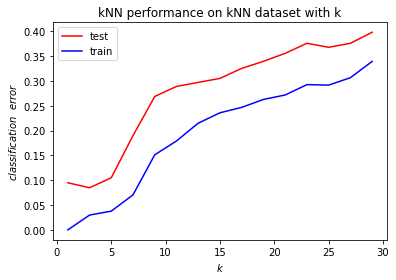

In [26]:
errors = map(lambda k: knn_classifier_score(k, nn_X_train, nn_y_train, nn_X_test, nn_y_test), k_values)
errors = list(errors)
test_error = [x[0] for x in errors]
train_error = [x[1] for x in errors]

plot_test_training_err(k_values, test_error, train_error, 
title='kNN performance on kNN dataset with k', 
hyperparam='k')

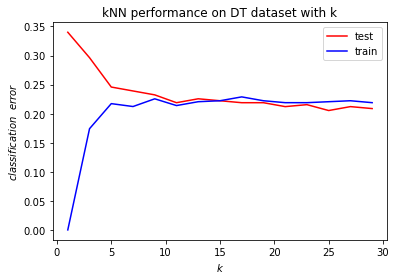

In [27]:
errors = map(lambda k: knn_classifier_score(k, dt_X_train, dt_y_train, dt_X_test, dt_y_test), k_values)
errors = list(errors)
test_error = [x[0] for x in errors]
train_error = [x[1] for x in errors]

plot_test_training_err(k_values, test_error, train_error, 
title='kNN performance on DT dataset with k', 
hyperparam='k')

kNN score on DT dataset: 0.70


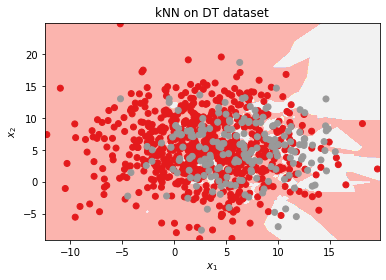

In [28]:
# kNN
k = 3

knn = kNC(n_neighbors=k)
knn.fit(dt_X_train, dt_y_train)
print('kNN score on DT dataset: %.2f' % (knn.score(dt_X_test, dt_y_test)))

plot_classifier_boundary(knn, dt_X, dt_y, title='kNN on DT dataset')

DT score on DT dataset: 0.69


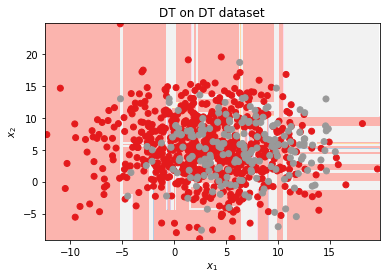

In [29]:
# Decision Trees
# add cross validation to find right hyperparameters

dtree=DTC(criterion='entropy', max_depth=max_depth, min_samples_split=min_samples_split)
dtree.fit(dt_X_train, dt_y_train)

print('DT score on DT dataset: %.2f' % (dtree.score(dt_X_test, dt_y_test)))

plot_classifier_boundary(dtree, dt_X, dt_y, title='DT on DT dataset')
# plot_tree(dtree)

DT score on kNN dataset: 0.85


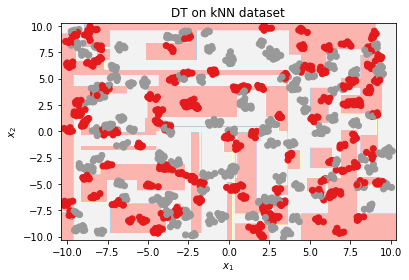

In [30]:
# Decision Trees

dtree=DTC(criterion='entropy', max_depth=max_depth, min_samples_split=min_samples_split)
dtree.fit(nn_X_train, nn_y_train)

print('DT score on kNN dataset: %.2f' % (dtree.score(nn_X_test, nn_y_test)))

plot_classifier_boundary(dtree, nn_X, nn_y, title='DT on kNN dataset')
# plot_tree(dtree)

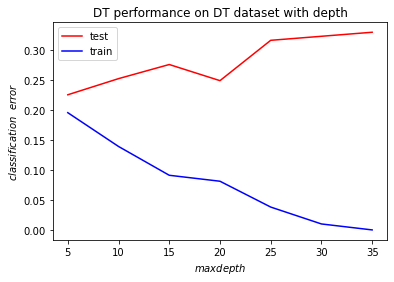

In [36]:
# DT Hyperparam Tuning
errors = map(lambda depth: dt_classifier_score(depth, dt_X_train, dt_y_train, dt_X_test, dt_y_test), depth_values)
errors = list(errors)
test_error = [x[0] for x in errors]
train_error = [x[1] for x in errors]

plot_test_training_err(depth_values, test_error, train_error, 
title='DT performance on DT dataset with depth', 
hyperparam='max depth')

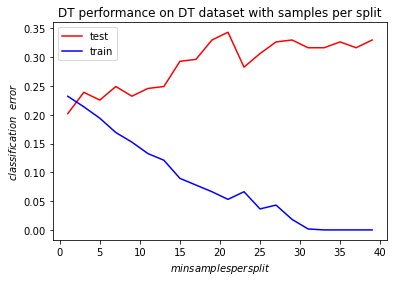

In [37]:
# DT Hyperparam Tuning
errors = map(lambda sample: dt_classifier_score(sample, dt_X_train, dt_y_train, dt_X_test, dt_y_test), samples_values)
errors = list(errors)
test_error = [x[0] for x in errors]
train_error = [x[1] for x in errors]

plot_test_training_err(samples_values, test_error, train_error, 
title='DT performance on DT dataset with samples per split', 
hyperparam='samples')

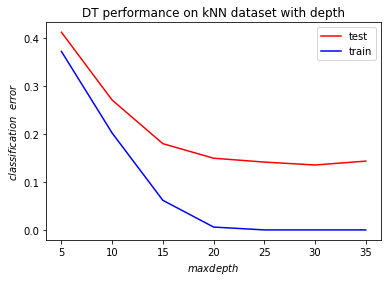

In [38]:
# DT Hyperparam Tuning
errors = map(lambda depth: dt_classifier_score(depth, nn_X_train, nn_y_train, nn_X_test, nn_y_test), depth_values)
errors = list(errors)
test_error = [x[0] for x in errors]
train_error = [x[1] for x in errors]

plot_test_training_err(depth_values, test_error, train_error, 
title='DT performance on kNN dataset with depth', 
hyperparam='max depth')

In [ ]:
# DT Hyperparam Tuning
errors = map(lambda sample: dt_classifier_score(sample, nn_X_train, nn_y_train, nn_X_test, nn_y_test), samples_values)
errors = list(errors)
test_error = [x[0] for x in errors]
train_error = [x[1] for x in errors]

plot_test_training_err(samples_values, test_error, train_error, 
title='DT performance on kNN dataset with samples per split', 
hyperparam='samples')